In [62]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [63]:
data = np.load("data_subset_noise_estimation/finaldata.npz", allow_pickle=True)
vlimits = np.load("data_subset_noise_estimation/verticallimits.npz", allow_pickle=True)

In [64]:
list(data.keys())

['lowerlimits', 'upperlimits', 'images']

In [65]:
list(vlimits.keys())

['start', 'end']

In [66]:
lower = data["lowerlimits"].T
upper = data["upperlimits"].T
images = data["images"]

In [67]:
vstart = vlimits["start"][0]
vend = vlimits["end"][0]

In [68]:

import attr

@attr.attrs
class Rgram():
    image = attr.ib()
    lower = attr.ib()
    upper = attr.ib()
    col_start = attr.ib()
    col_end = attr.ib()
    
    name = attr.ib()
    ts_positions = attr.ib(factory=list)
    tseries = attr.ib(factory=list)
    
    mtm_outputs = attr.ib(factory=list)
    
    def show(self):
        figure(figsize=(15,15))
        imshow(self.image)

        scatter(*self.lower.T)
        scatter(*self.upper.T)


        vlines([self.col_start, self.col_end], 0, self.image.shape[0])
        
        for pos in self.ts_positions:
            vlines([pos], 0, self.image.shape[0], color="red")
        
    def generate_ts_positions(self, n_series=5):
        ran = self.col_end - self.col_start
        spacing = ran / (n_series +1)
        positions = self.col_start + (np.arange(n_series)+1 ) * int(floor(spacing))
        self.ts_positions = positions.astype(int)
        
        print(self.ts_positions)
        self.extract_ts()
        
    def extract_ts(self):
        for pos in self.ts_positions:
            up = self.upper[:,1][self.upper[:,0] == pos][0]
            low = self.lower[:,1][self.lower[:,0] == pos][0]
            print(f"from {up} to {low}")
            
            ts = self.image[:,pos][up:low]
            self.tseries.append(ts)
            
        

In [69]:
rgrams = []
names = ['04523601', '04236001', '02181401' ,'01321501', '01399202', '04441202' , '04260401' ,'02022501', '01286601',
         '01373502']
for id, (i, name) in enumerate(zip(images, names)):
    if id not in [5,8,9]:
        continue
    low = np.column_stack([lower[id][1], lower[id][0]])
    up = np.column_stack([upper[id][1], upper[id][0]])
    r = Rgram(i, low, up, vstart[id], vend[id], name=name)
    rgrams.append(r)
 

In [70]:
rgram.upper

array([[ 236,  419],
       [ 237,  416],
       [ 238,  415],
       ...,
       [2472,  602],
       [2473,  603],
       [2474,  604]])

In [83]:
from matplotlib.markers import MarkerStyle

msize= 6
fsize=12

v = MarkerStyle("v")
v._transform.translate(0,0.5)

v2 = MarkerStyle("^")
v2._transform.translate(0,-0.5)

def plot_radargram(rgram:Rgram):
    figure(figsize=(9,6))
    imshow(rgram.image)

    scatter(*rgram.lower.T, s=0.5,marker=".", color="orange" )
    scatter(*rgram.upper.T, s=0.5, marker=".", color="yellow" )
    print(rgram.col_start)
    

    
#     vlines([rgram.col_start, rgram.col_end], starts ,ends  )
    
    top_points = []
    bot_points = []
    for pos in rgram.ts_positions:
        up = rgram.upper[:,1][rgram.upper[:,0] == pos][0]
        low = rgram.lower[:,1][rgram.lower[:,0] == pos][0]
        
        vlines([pos], low, up, edgecolor="white", zorder=10, linewidth=1.5, alpha=0.2)
        
        top_points.append([pos, up])
        bot_points.append([pos, low])
        
    scatter(*np.array(top_points).T, marker=v, color="white", s=msize)
    scatter(*np.array(bot_points).T, marker=v2, color="white", s=msize)
    
    ids = np.arange(len(top_points)).astype(str)
    for id, (x,y) in zip(ids, top_points):
        text(x,y-20,id , horizontalalignment='center',verticalalignment="bottom", color="white", fontsize=fsize)
        
    gca().set_ylim(bottom=rgram.image.shape[0])
    tight_layout()


In [84]:
# vlines?

[560 640 720 800 880]
from 334 to 461
from 337 to 472
from 343 to 464
from 337 to 470
from 321 to 456
480.0
[1850 1930 2010 2090 2170]
from 379 to 510
from 363 to 490
from 354 to 462
from 359 to 499
from 377 to 489
1770.0
[1229 1293 1357 1421 1485]
from 318 to 446
from 327 to 472
from 339 to 477
from 345 to 484
from 361 to 494
1165.0


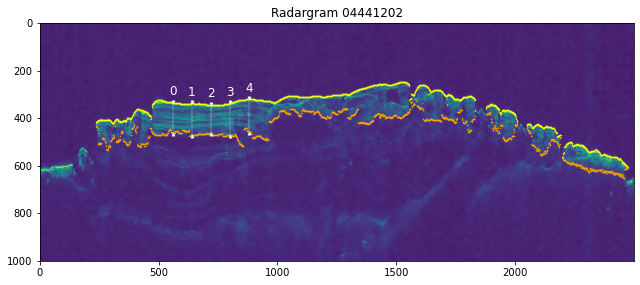

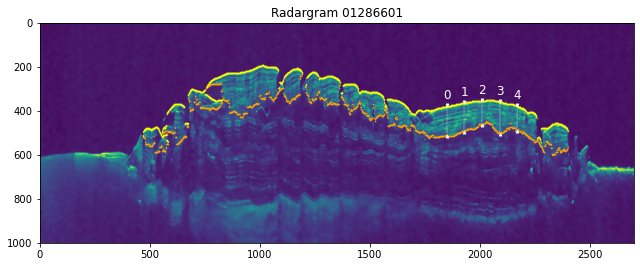

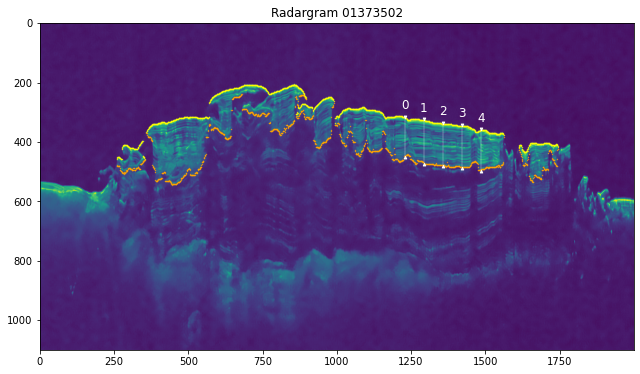

In [86]:
for rgram in rgrams:
    rgram.generate_ts_positions()
    plot_radargram(rgram)
    title(f"Radargram {rgram.name}")
    
    savefig(f"selected_ts_{rgram.name}.png", dpi=300)

[560 640 720 800 880]
from 334 to 461
from 337 to 472
from 343 to 464
from 337 to 470
from 321 to 456
[1850 1930 2010 2090 2170]
from 379 to 510
from 363 to 490
from 354 to 462
from 359 to 499
from 377 to 489
[1229 1293 1357 1421 1485]
from 318 to 446
from 327 to 472
from 339 to 477
from 345 to 484
from 361 to 494


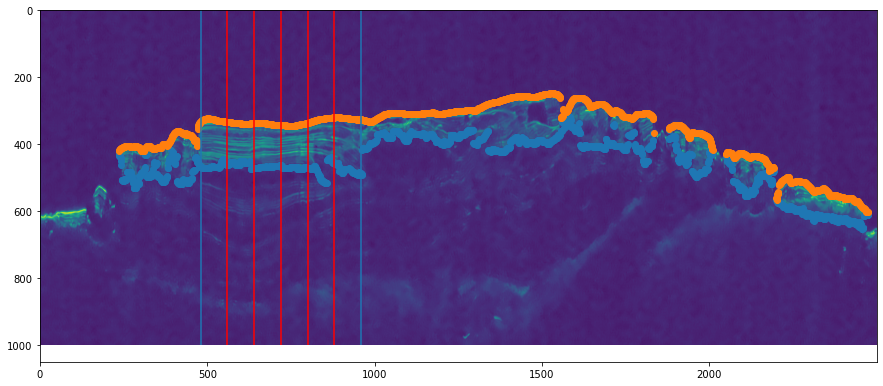

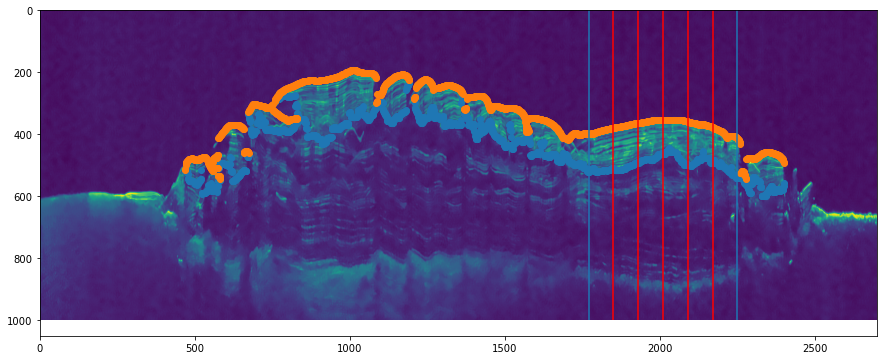

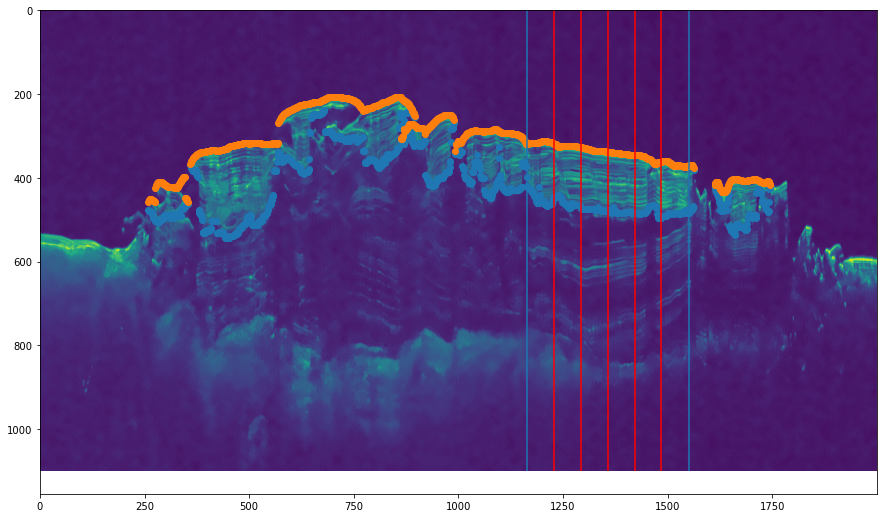

In [109]:
for rgram in rgrams:
    rgram.generate_ts_positions()
    rgram.show()

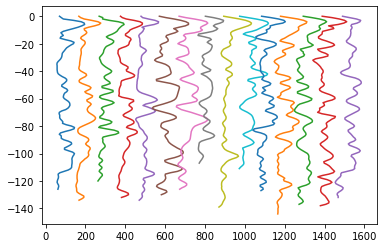

In [26]:
counter = 0
for rgram in rgrams:
    for ts in rgram.tseries:
        plot( ts+(counter*100.0), -np.arange(len(ts)))
        counter+=1

In [27]:
# ac.mtmML96?

In [28]:
from rpy2.robjects.packages import importr
utils = importr('utils')
# utils.chooseCRANmirror(ind=1)
# utils.install_packages('astrochron')

from rpy2.robjects.packages import importr
ac = importr("astrochron")

import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()


sampling_step = 3 # meters

for rgram in rgrams:
    for ts in rgram.tseries:
        s = ts
        dat = np.column_stack([np.arange(len(s))*sampling_step, s])
        power = ac.mtmML96(dat, linLog=1, output=1, genplot=False, 
                           detrend=True, demean=True, padfac=20,
                          medsmooth=0.3, pl=2, opt=3, xmax=0.25, verbose=False)
        
        rgram.mtm_outputs.append( power )

<ipython-input-36-aaa8d9160447>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  other.set_xticklabels(inverse_ticks)
<ipython-input-36-aaa8d9160447>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  other.set_xticklabels(inverse_ticks)
<ipython-input-36-aaa8d9160447>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  other.set_xticklabels(inverse_ticks)
<ipython-input-36-aaa8d9160447>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  other.set_xticklabels(inverse_ticks)
<ipython-input-36-aaa8d9160447>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  other.set_xticklabels(inverse_ticks)
<ipython-input-36-aaa8d9160447>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  other.set_xticklabels(inverse_ticks)
<ipython-input-36-aaa8d9160447>:58: UserWarning: FixedFormatter should only be used together with Fi

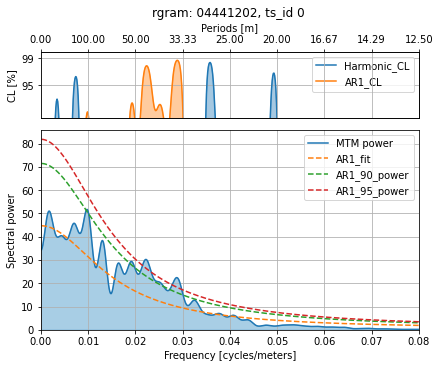

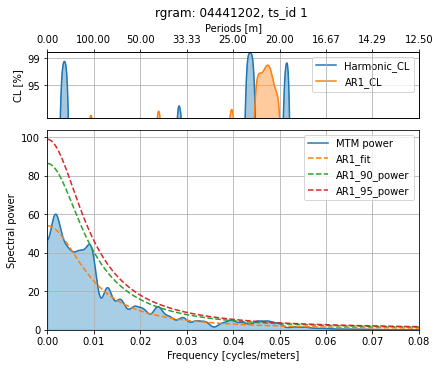

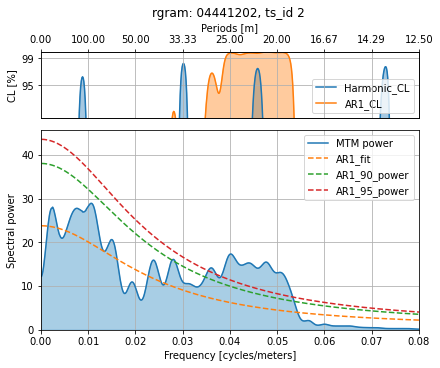

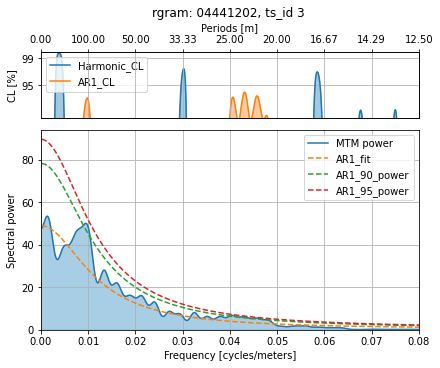

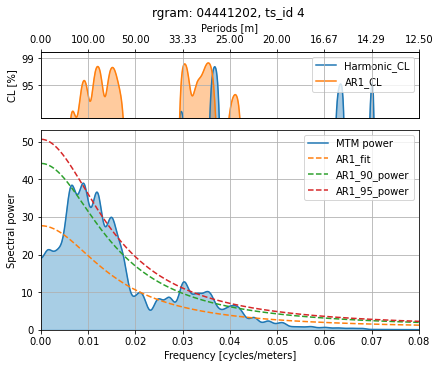

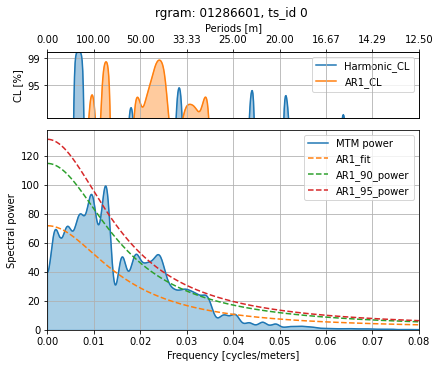

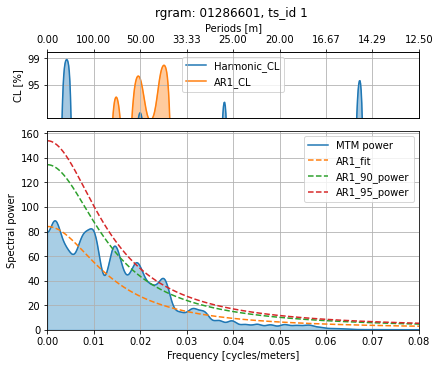

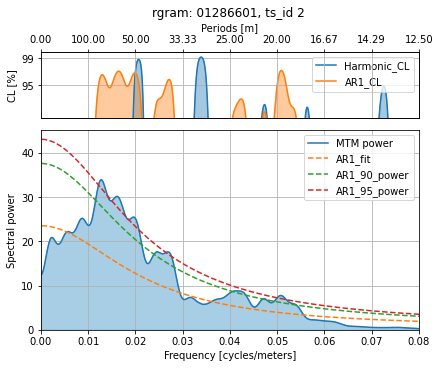

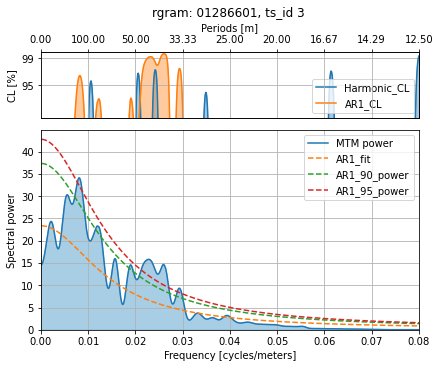

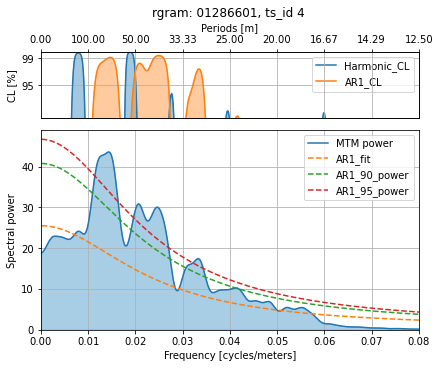

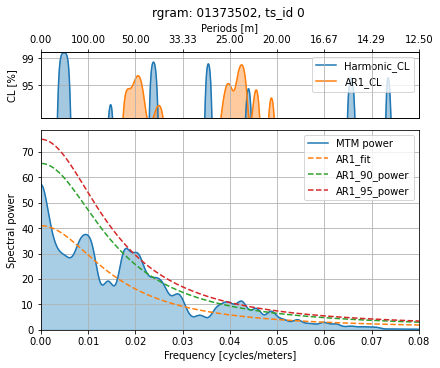

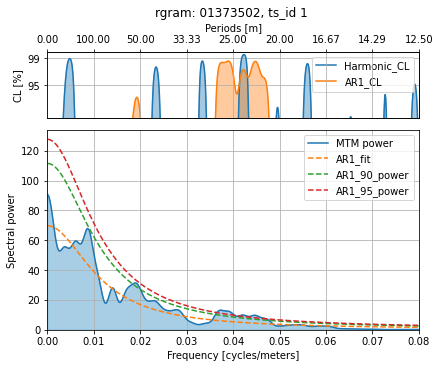

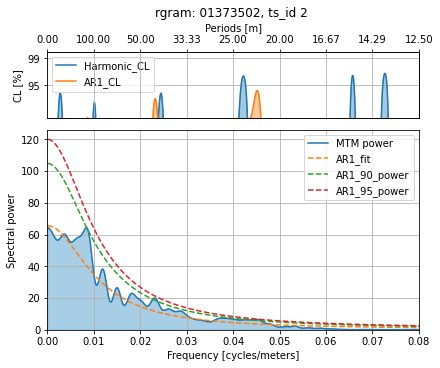

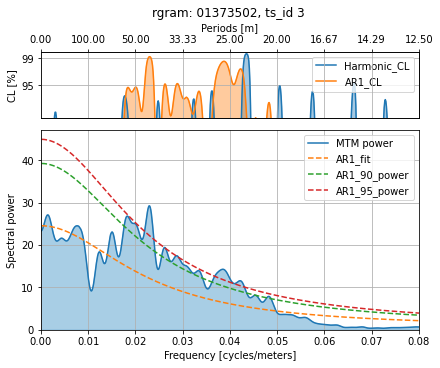

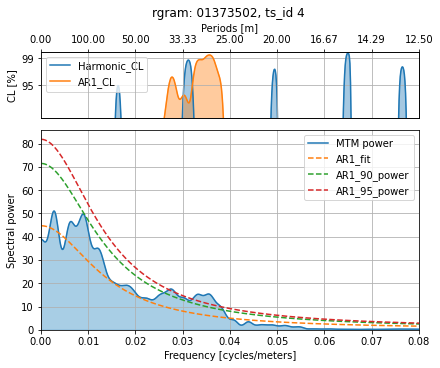

In [36]:
def generate_plot_spectrum(data, figsize=(6,5), ptitle=None):
    power= data
    fig = figure(constrained_layout=True, figsize=figsize)
   
    gs = fig.add_gridspec(4, 1)

    ax1= fig.add_subplot(gs[:1])
    grid()
    ax1.get_yaxis().set_ticks([95, 99])
    
    f, p = power.Frequency, power.Power
    ylabel("CL [%]")

    for name in ['Harmonic_CL', 'AR1_CL',]:
        plotted = plot(f, power[name], label=name)
        plt.fill_between(f, 0, power[name], color=plotted[0].get_color(), alpha=0.4)
    
    ylim(90, 100)
    legend() 
    other = ax1.twiny()
    
    if ptitle:
        title(ptitle)
    

    other.set_xlabel("Periods [m]")
    

    
    ax2= fig.add_subplot(gs[1:], sharex = ax1)
    plot(f,p, label="MTM power") 
    plt.fill_between(f, 0, p, color='#539ecd', alpha=0.5)

    for name in [ 'AR1_fit', 'AR1_90_power', 'AR1_95_power']:
        plot(f, power[name], "--", label=name)

    ylabel("Spectral power") 

    ax1.get_xaxis().set_visible(False)
    xlim(0,0.08)
    xlabel("Frequency [cycles/meters]")
    legend()
    
    ax2.set_ylim(bottom=0)
    
    grid()
    
    # fix the top axis with periods
    other.set_xlim(ax2.get_xlim())
    other.grid()
    
    inverse_ticks = []
    label_format = '%.2f'
    for tick in ax2.get_xticks():
        if tick != 0:
            tick = 1/tick
        inverse_ticks.append(label_format % (tick,))
    other.set_xticklabels(inverse_ticks)
   
    
#     tight_layout()
for rgram in rgrams:
    for i,  out in enumerate(rgram.mtm_outputs):
        ptitle = f"rgram: {rgram.name}, ts_id {i} "
        generate_plot_spectrum(out, ptitle=ptitle)
        savefig(ptitle + ".png", dpi=300)

In [30]:
rgrams

[Rgram(image=array([[39, 42, 37, ..., 37, 40, 39],
        [37, 41, 37, ..., 38, 40, 40],
        [36, 40, 37, ..., 38, 41, 41],
        ...,
        [36, 36, 38, ..., 38, 39, 36],
        [36, 36, 37, ..., 38, 39, 35],
        [37, 35, 37, ..., 38, 39, 35]], dtype=uint8), lower=array([[ 236,  428],
        [ 237,  434],
        [ 238,  436],
        ...,
        [2472,  611],
        [2473,  611],
        [2474,  610]]), upper=array([[ 236,  419],
        [ 237,  416],
        [ 238,  415],
        ...,
        [2472,  602],
        [2473,  603],
        [2474,  604]]), col_start=480.0, col_end=960.0, name='04441202', ts_positions=array([560, 640, 720, 800, 880]), tseries=[array([ 70,  79,  89, 140, 179, 194, 196, 182, 163, 139, 113,  89,  77,
         83,  89,  77,  73,  98, 127, 143, 140, 127, 116, 106, 100,  95,
         89,  84,  83,  82,  80,  76,  70,  63,  58,  57,  58,  58,  58,
         58,  59,  60,  64,  73,  84,  98, 106, 106, 100,  92,  82,  81,
         92, 106, 111, 106